In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator

from LogicalQ.LogicalGeneral import LogicalCircuitGeneral
from LogicalQ.Library.QECCs import five_qubit_code, steane_code
from LogicalQ.NoiseModel import construct_noise_model_QuantinuumH1_1
from LogicalQ.Experiments import execute_circuits

%load_ext autoreload
%autoreload 2

## Demonstrating error correction

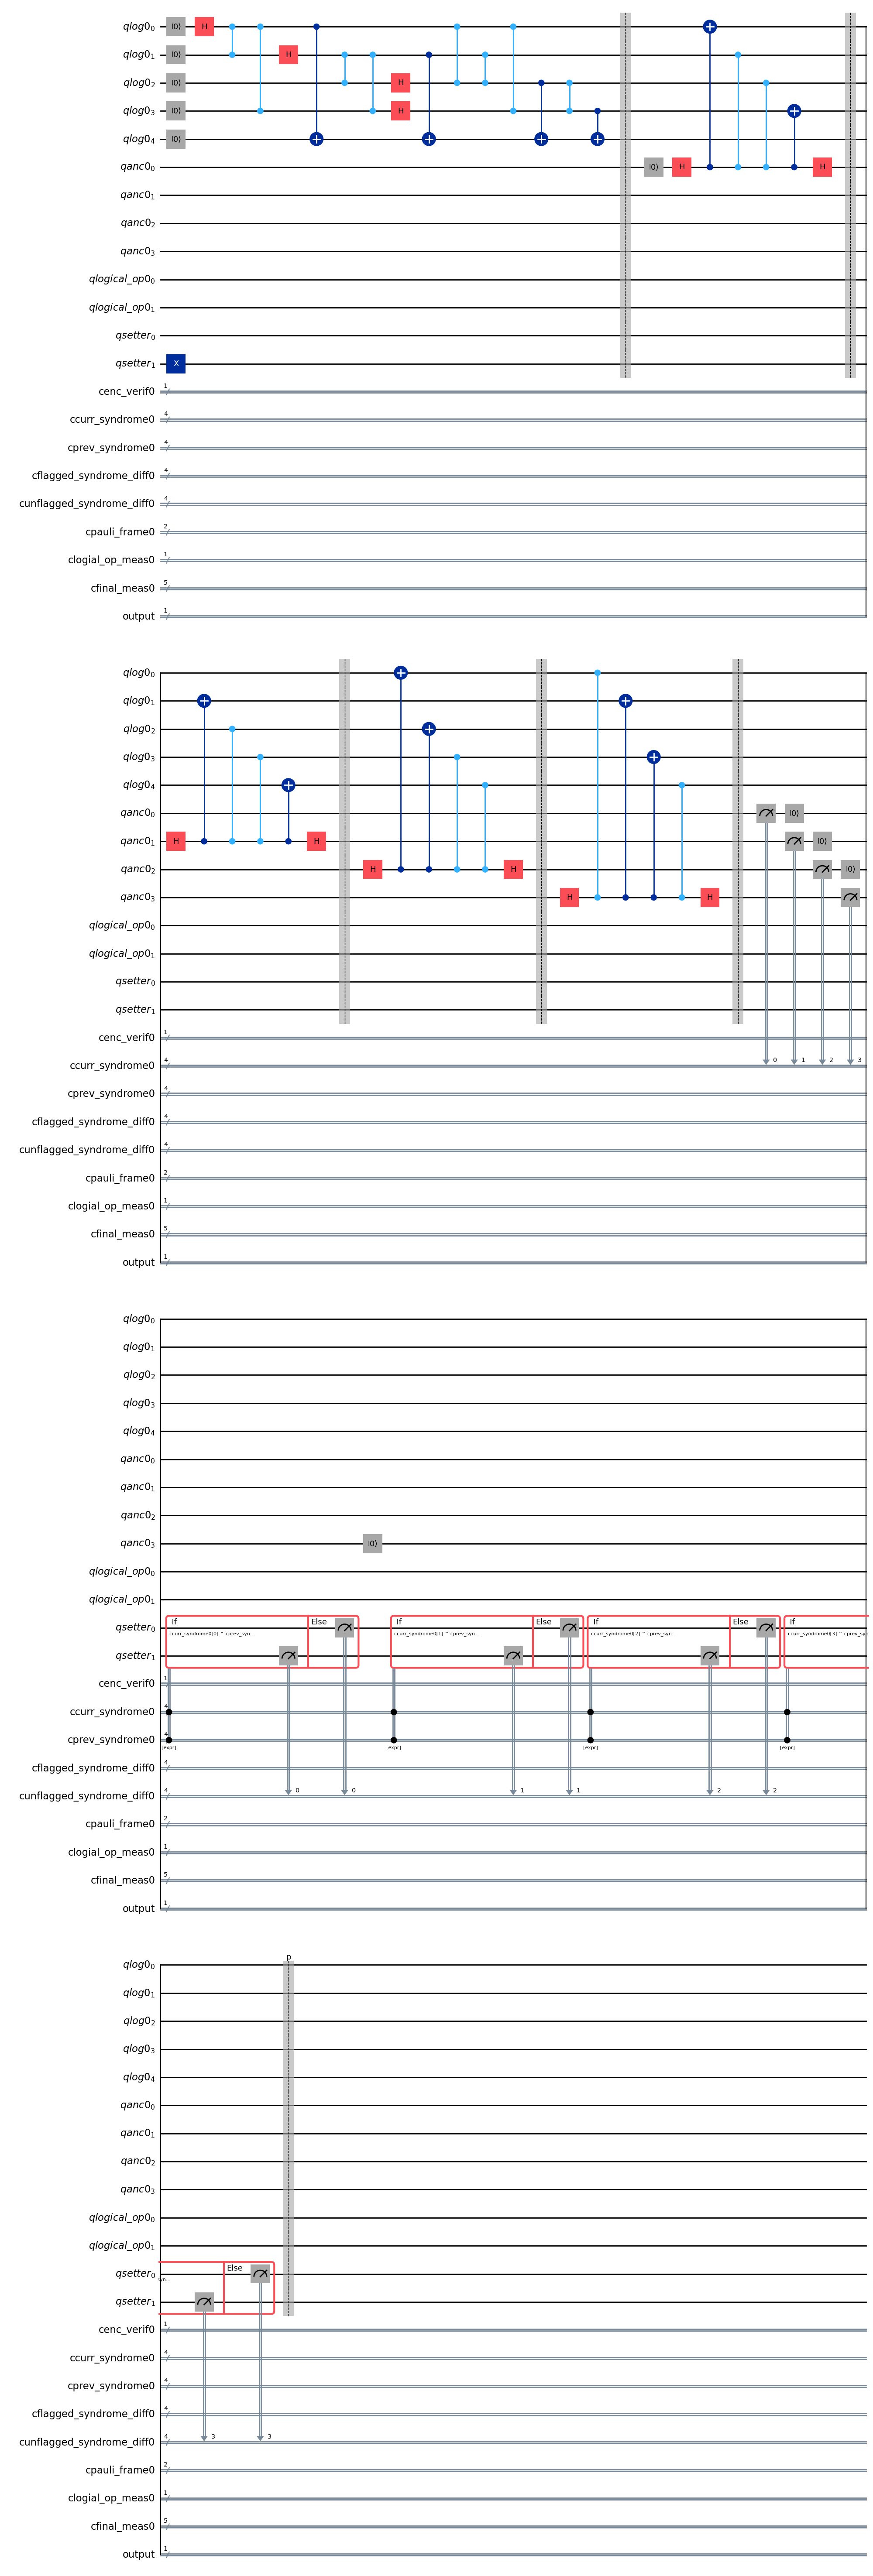

In [3]:
from qiskit.quantum_info import partial_trace 

five_qubit_circ = LogicalCircuitGeneral(1, **five_qubit_code, name='a')
five_qubit_circ.encode(0)
#five_qubit_circ.add_error(0, 0, 'X')
five_qubit_circ.measure_syndrome_diff([0])
five_qubit_circ.save_density_matrix(label='p')

simulator = AerSimulator()
result = execute_circuits(five_qubit_circ, backend=simulator, shots=1, memory=True)[0]
output = result.get_memory(five_qubit_circ)

five_qubit_circ.draw('mpl')

In [4]:
print(output)

['0 00000 0 00 0101 0000 0000 0101 0']


In [5]:
density_matrix = result.data()['p']
reduced_density_matrix = partial_trace(density_matrix, [5,6,7,8,9,10,11,12])
sv = reduced_density_matrix.to_statevector()
sv.draw(output='latex')

<IPython.core.display.Latex object>